<a href="https://colab.research.google.com/github/tillu1208/Complete-Placement-Preparation/blob/main/19_03_ocr_language_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px"> Application: Language Translation using OCR</h1>

You can create many interesting and useful computer vision application once you know how to perform Text Detection and Recognition on images. We will build a simple but useful application that allows you to translate text from one language to a language of your choice. This is particularly useful for tourists going to a country where the local language is very different from their country. Just take a picture of the text you don't understand and the app would tell you what's written!

For the language translation part, we will be using a library called [**googletrans**](https://pypi.org/project/googletrans/) (specifically v4), which uses the Google Translate API under the hood. The **`googletrans`** supports automatic detection of input language and translation to multiple languages.

You may also use the [Official Google Translate API](https://cloud.google.com/translate), but that would require additional setup. We wanted to introduce you to this exciting application with minimal hassle and thus we're using the googletrans package.

We have also created a streamlit app for this use case that you can try out.


# 1. Install the googletrans library

[**`googletrans()`**](https://py-googletrans.readthedocs.io/en/latest/)

Uncomment the code below to install the googletrans package if not installed already.

Note that we need the specific version `4.0.0-rc1`.


In [1]:
# !pip install googletrans==4.0.0-rc1
# !pip install pyttsx3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 970.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=dfcca9869394b6c4dc1c102a7dfe9d56ff41c8cc230dc254176385b4f9b7f883
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [2]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/2am8d2yn4xrzk9i/AAAiJEQuwzAysEe6jNUGuCH4a?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    %cd Applications/
    !pip install --upgrade opencv-contrib-python
    !pip install googletrans==4.0.0-rc1
    !pip install pyttsx3
else:
    pass

module-code.zip     100%[===================>] 309.59M  55.6MB/s    in 6.2s    
mapname:  conversion of  failed
/content/Applications
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


# 2. Import the required libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import googletrans

plt.rcParams['image.cmap'] = 'gray'

# 3. Google Translator Python API documentation


## 3.1 Check Languages Supported

In [4]:
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

## 3.2 Create a Translator Object

Create a Translator Object. We will use this later to perform language translation

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Googletrans Documentation</font>

[**`googletrans.Translator()`**](https://py-googletrans.readthedocs.io/en/latest/#googletrans.Translator)
<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [5]:
# Create a Translator Object
translator = googletrans.Translator()

## 3.3 Automatic detection of language

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>

You can use the **`detect`** method to check the language of the input text.
```
translator.detect(text).lang
```

### <font color="green">Googletrans Documentation</font>

[**`detect()`**](https://py-googletrans.readthedocs.io/en/latest/#googletrans.Translator.detect)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [6]:
translator.detect("house").lang

'en'

In [7]:
translator.detect("casa").lang

'en'

In [8]:
translator.detect("evaru").lang

'te'

### Sample Input Text

In [9]:
inputText = "house"

## 3.4 Translate in other Languages

The translation is obtained using the method **`translate`**.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>
```
translator.translate(input, dest, src)
```
The function has **3 arguments**:

* `input`: input text
* `src`: source language of the input text, default is 'auto' for auto detect
* `dest`: destination language in which you want the translated output, default is 'en'


### <font color="green">Googletrans Documentation</font>

[**`translate()`**](https://py-googletrans.readthedocs.io/en/latest/#googletrans.Translator.translate)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [10]:
result = translator.translate(inputText, dest="de")
print(result.text) # Display German text.

Haus


In [11]:
result = translator.translate(inputText, dest="es")
print(result.text) # Display Spanish text.

casa


In [12]:
result = translator.translate(inputText, dest="hi")
print(result.text) # Display Hindi text.

घर


In [13]:
result = translator.translate(inputText, dest="te")
print(result.text) # Display Telugu text.

ఇల్లు


Be sure to try this out in your favourite language!

# 4. Language Translation on Images

We will use the googletrans library along with out Text recognition pipeline to perform language translation on images. Let us load a sample image.

## 4.1 Load the image and vocabulary

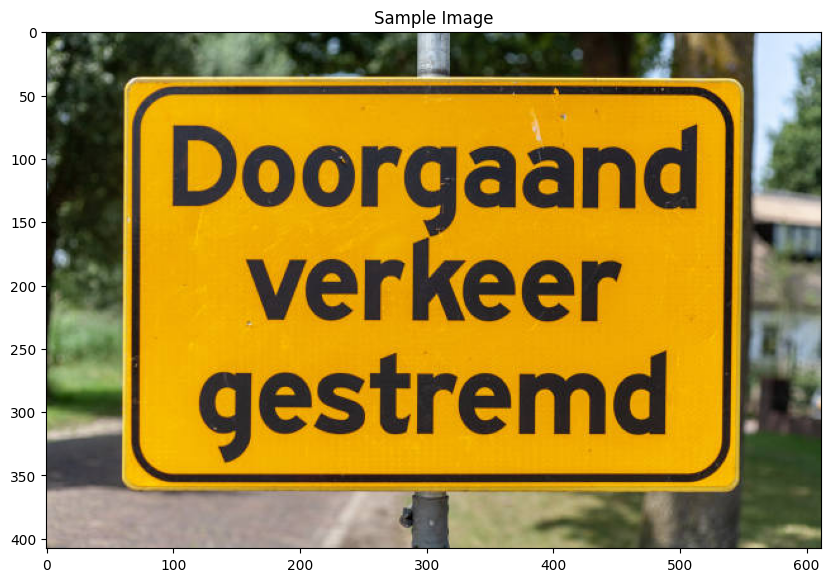

In [14]:
image = cv2.imread('../visuals/dutch_signboard.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(image[:, :, ::-1]); plt.title('Sample Image');

Next, like before, we need to load in the vocabulary the model can detect.

In [15]:
# Define list to store the vocabulary in.
vocabulary =[]
# Open file to import the vocabulary.
with open("./alphabet_94.txt") as f:
    # Read the file line by line, and append each into the vocabulary list.
    for line in f:
        vocabulary.append(line.strip())
    f.close()

## 4.2 Import the pre-built text detection and text recognition model files

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

For the text detection in the image, we will be using the DB based text detection deep learning neural network model covered in the previous notebook.

[**`DB Text Detection Model()`**](https://docs.opencv.org/master/db/d0f/classcv_1_1dnn_1_1TextDetectionModel__DB.html)


In [16]:
# DB model for text-detection based on resnet50
textDetector = cv2.dnn_TextDetectionModel_DB("../resources/DB_TD500_resnet50.onnx")

inputSize = (640, 640)

# Set threshold for Binary Map creation and polygon detection
binThresh = 0.3
polyThresh = 0.5

mean = (122.67891434, 116.66876762, 104.00698793)

textDetector.setBinaryThreshold(binThresh).setPolygonThreshold(polyThresh)
textDetector.setInputParams(1.0/255, inputSize, mean, True)


For the text recognizer we will be using a CRNN based deep learning model that is trained on 2 datasets:

* MJsynth and
* SynthText

It can identify all characters along with punctuations. Thus, there are 94 characters in the alphabet.

[**`Text Recognition Model()`**](https://docs.opencv.org/4.5.2/de/dee/classcv_1_1dnn_1_1TextRecognitionModel.html)

In [17]:
# CRNN model for text-recognition
textRecognizer = cv2.dnn_TextRecognitionModel("../resources/crnn_cs.onnx")
textRecognizer.setDecodeType("CTC-greedy")
textRecognizer.setVocabulary(vocabulary)
textRecognizer.setInputParams(1/127.5, (100,32), (127.5, 127.5, 127.5), True)

## 4.3 Align Text Boxes

Geometric image transformation functions are used to align the text boxes horizontally by applying perspective transform on the roi boxes detected by the DB text detector. This will help the text recognizer to identify the characters better.

[**`Geometric Image Transforms()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html)

In [18]:
def fourPointsTransform(frame, vertices):
    """Extracts and transforms roi of frame defined by vertices into a rectangle."""
    # Print vertices of each bounding box
    vertices = np.asarray(vertices).astype(np.float32)
    outputSize = (100, 32)
    targetVertices = np.array([
        [0, outputSize[1] - 1],
        [0, 0],
        [outputSize[0] - 1, 0],
        [outputSize[0] - 1, outputSize[1] - 1]], dtype="float32")
    # Apply perspective transform
    rotationMatrix = cv2.getPerspectiveTransform(vertices, targetVertices)
    result = cv2.warpPerspective(frame, rotationMatrix, outputSize)
    return result

# 5. Perform Language Translation on Recognized Text

The pipeline is same as discussed in the previous notebooks, the only change being that we pass each recognized text to the translator and use the output to display on the canvas.

In [19]:
def recognizeTranslateText(image, dest='en', src='', debug=False):
    """Recognizes and translates text to translate and display in English."""

    # Create a blank matrix to be used to display the output image.
    outputCanvas = np.full(image.shape[:3], 255, dtype=np.uint8)

    # Use the DB text detector initialised previously to detect the presence of text in the image
    boxes, confs = textDetector.detect(image)

    # Iterate through the bounding boxes detected by the text detector model.
    for box in boxes:

        # Apply transformation on the bounding box detected by the text detection algorithm.
        croppedRoi = fourPointsTransform(image, box)
        if debug:
            plt.imshow(croppedRoi); plt.show()

        # Recognise the text using the crnn model.
        recognizedText = textRecognizer.recognize(croppedRoi)
        if src:
            translation = translator.translate(recognizedText, dest, src)
        else:
            translation = translator.translate(recognizedText, dest)
        print("Recognized Text[{}]: {} -> Translated Text[{}]: {}".format(
            googletrans.LANGUAGES[translation.src],
            recognizedText,
            googletrans.LANGUAGES[dest],
            translation.text))

        # Get scaled values.
        boxHeight = int((abs((box[0, 1] - box[1, 1]))))

        # Get scale of the font.
        fontScale = cv2.getFontScaleFromHeight(
            cv2.FONT_HERSHEY_SIMPLEX, boxHeight-5, 1)

        # Write the recognised text on the output image.
        placement = (int(box[0, 0]), int(box[0, 1]))
        cv2.putText(outputCanvas, translation.text, placement,
            cv2.FONT_HERSHEY_SIMPLEX, fontScale, (255, 0, 0), 1, 5)

    # Draw the bounding boxes of text detected.
    cv2.polylines(image, boxes, True, (255, 0, 255), 3)

    # Concatenate the input image with the output image.
    combinedResult = cv2.hconcat([image, outputCanvas])

    # Display the output Image
    plt.figure(figsize=[20, 10])
    plt.imshow(combinedResult[:, :, ::-1]); plt.title('Translation Output')

### Example 1

Recognized Text[afrikaans]: gestremd -> Translated Text[english]: disabled
Recognized Text[dutch]: verkeer -> Translated Text[english]: traffic
Recognized Text[dutch]: Doorgaand -> Translated Text[english]: Thorough


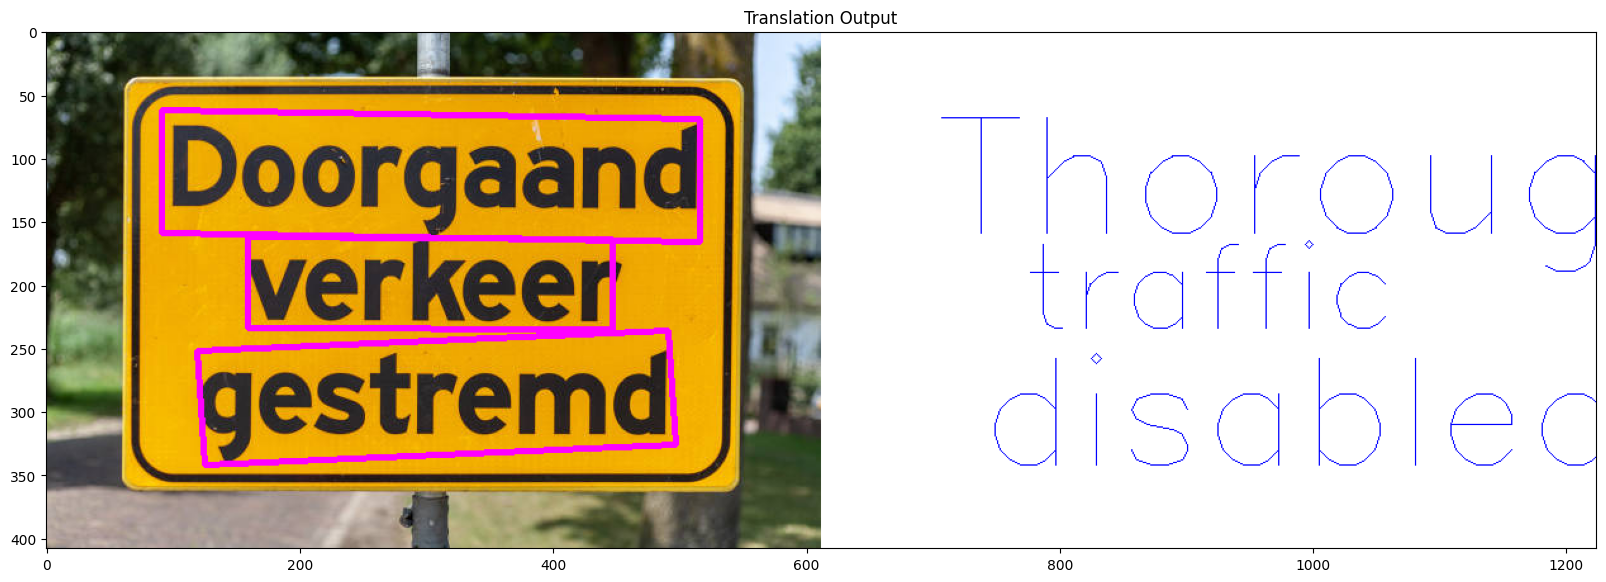

In [20]:
# Load Image
image = cv2.imread('../visuals/dutch_signboard.jpg')
recognizeTranslateText(image)

### Example 2

Recognized Text[kurdish (kurmanji)]: DerBirgermeister -> Translated Text[english]: Abirgermeister
Recognized Text[german]: StadtFalkensee -> Translated Text[english]: City folkensee
Recognized Text[german]: verboten -> Translated Text[english]: forbidden
Recognized Text[german]: Betreton -> Translated Text[english]: Intrusion
Recognized Text[german]: Eisflache -> Translated Text[english]: Ice flat


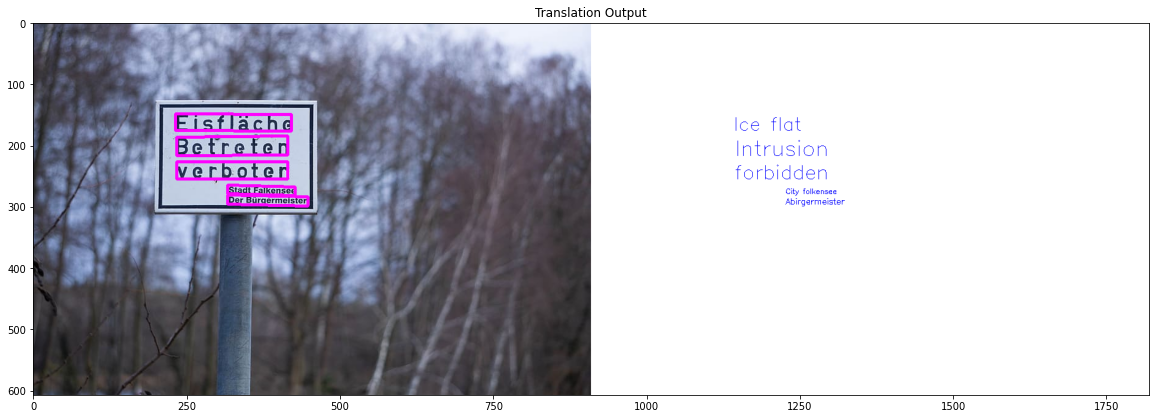

In [ ]:
# Load Image
image = cv2.imread('../visuals/german_sign.jpg')
recognizeTranslateText(image)

There is a small mistake that it identifies the first word as being Kurdish. Thus the translation is also wrong. Let us specify the source language so that the translation is correct.

Recognized Text[german]: DerBirgermeister -> Translated Text[english]: Champion
Recognized Text[german]: StadtFalkensee -> Translated Text[english]: City folkensee
Recognized Text[german]: verboten -> Translated Text[english]: forbidden
Recognized Text[german]: Betreton -> Translated Text[english]: Intrusion
Recognized Text[german]: Eisflache -> Translated Text[english]: Ice flat


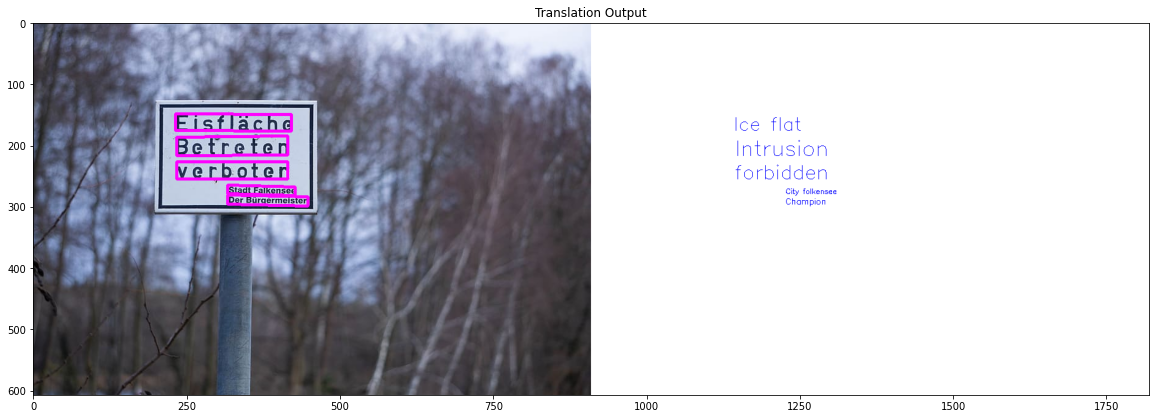

In [ ]:
# Load Image.
image = cv2.imread('../visuals/german_sign.jpg')
recognizeTranslateText(image, src='de')

# Conclusion

As you can see, the powers of text recognition and translation are at your finger tips. While the initial results here are not always perfect, they still have great utility for venturing into another country.

You can imagine many extensions to build on top of this capability. Consider the possibility combining prior modules like image inpainting to fill in the detect text rectangles, to then superimpose our translated results back onto the screen.